### Zadatak 1
Riješite simbolički i numerički diferencijalnu jednadžbu tjeranog gušenog har-
moničkog oscilatora: $${\frac{d^2x}{dt^2} + 4\frac{dx}{dt} + 8x = 20\cos(2t), \space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space(1)}$$
pri čemu H.O. u početnom trenutku miruje u ishodištu.
Na jednom grafu nacrtajte ovisnost položaja i brzine H.O. o vremenu. Graf
neka prikazuje simboličko i numeričko rješenje. Odaberite linije tako da se
uočavaju oba rješenja, čak i ako se linije preklapaju (npr. jedno od rješenja
neka bude nacrtano punom a drugo isprekidanom linijom). Na posebnom grafu
nacrtajte fazni dijagram (ovisnost brzine o položaju).

Eq(x(t), (C1*sin(2*t) + C2*cos(2*t))*exp(-2*t) + 2*sin(2*t) + cos(2*t))
FiniteSet((-3, -1))
(-3*sin(2*t) - cos(2*t))*exp(-2*t) + 2*sin(2*t) + cos(2*t)


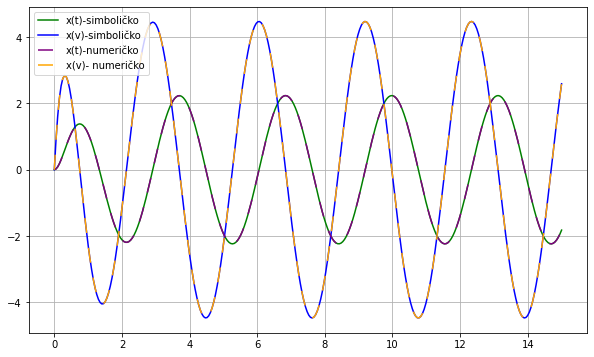

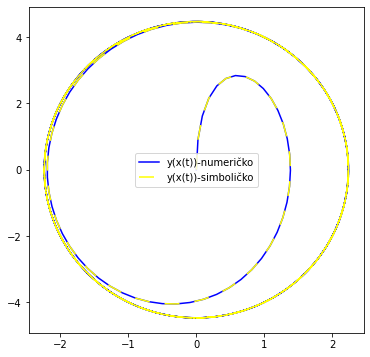

In [1]:
from sympy import *
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

t = symbols('t')
x = symbols('x', cls=Function)
# y = Function('y')
C1, C2 = symbols('C1, C2')
gsol = dsolve(x(t).diff(t, t) + 4*x(t).diff(t) + 8*x(t) - 20*cos(2*t), x(t))
print(gsol)

const = linsolve([gsol.rhs.subs(t, 0), gsol.rhs.diff(t).subs(t, 0)], C1, C2)
print(const)
dics = [{C1:c1, C2:c2} for c1, c2 in const]
sol = gsol.rhs.subs(dics[0])
print(sol)


def func(y, t):
    return [y[1], 20*np.cos(2*t) - 4*y[1] - 8*y[0]]

ts = np.linspace(0,15,300)
y0 = [0, 0]
ys = odeint(func, y0, ts)
xs = [sol.subs({t:n}) for n in ts]
v = [diff(sol, t).subs({t:n}) for n in ts]

fig, ax = plt.subplots(figsize=[10,6])
ax.plot(ts, xs, label='x(t)-simboličko', color='green')
ax.plot(ts, v, label='x(v)-simboličko', color='blue')
ax.plot(ts, ys[:,0], '--', dashes=[10, 10], label='x(t)-numeričko', color='purple')
ax.plot(ts, ys[:,1], '--', dashes=[10, 10], label='x(v)- numeričko', color='orange')
ax.legend()
ax.grid(True)

fig, ex = plt.subplots(figsize=[6,6])
ex.plot(ys[:,0], ys[:,1], label='y(x(t))-numeričko', color='blue')
ex.plot(xs, v, '--', dashes=[10, 10], label='y(x(t))-simboličko', color='yellow')
ex.legend()

In [5]:
ys[:, 1]

array([ 0.        ,  0.90443819,  1.6186975 ,  2.15532809,  2.52801724,
        2.75122206,  2.83985254,  2.809     ,  2.67370746,  2.44877731,
        2.14861233,  1.78708634,  1.37744071,  0.93220349,  0.46312795,
       -0.01885218, -0.50365328, -0.98206042, -1.44573602, -1.88722002,
       -2.29992331, -2.67811533, -3.01690698, -3.31222973, -3.56081146,
       -3.76014946, -3.90848133, -4.00475372, -4.04858927, -4.04025199,
       -3.98061101, -3.87110298, -3.71369295, -3.51083407, -3.26542589,
       -2.98077154, -2.6605337 , -2.30868962, -1.92948524, -1.52738854,
       -1.10704236, -0.67321689, -0.23076201,  0.21544016,  0.66052231,
        1.09967828,  1.52820831,  1.94156295,  2.33538528,  2.70555112,
        3.04820689,  3.35980477,  3.637135  ,  3.87735489,  4.07801417,
        4.2370769 ,  4.35293929,  4.42444338,  4.45088645,  4.43202621,
        4.36808147,  4.25972841,  4.10809251,  3.91473605,  3.68164152,
        3.41119082,  3.10614077,  2.7695948 ,  2.40497139,  2.01